In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from rich import pretty

import quantify_core.data.dataset_attrs as dattrs
from quantify_core.analysis.calibration import rotate_to_calibrated_axis
from quantify_core.analysis.fitting_models import exp_decay_func
from quantify_core.data import handling as dh
from quantify_core.utilities import dataset_examples
from quantify_core.utilities.examples_support import (
    mk_iq_shots,
    mk_trace_for_iq_shot,
    mk_trace_time,
    round_trip_dataset,
)
from quantify_core.utilities.inspect_utils import display_source_code
from quantify_core.visualization.mpl_plotting import (
    plot_complex_points,
    plot_xr_complex,
    plot_xr_complex_on_plane,
)

pretty.install()

dh.set_datadir(Path.home() / "quantify-data")  # change me!

In [2]:
display_source_code(dataset_examples.mk_two_qubit_chevron_dataset)

def mk_two_qubit_chevron_dataset ( ** kwargs ) -> xr . Dataset : 
 """ 
 Generates a dataset that look similar to a two-qubit Chevron experiment. 

 Parameters 
 ---------- 
 **kwargs 
 Keyword arguments passed to :func:`~.mk_two_qubit_chevron_data`. 

 Returns 
 ------- 
 : 
 A mock Quantify dataset. 
 """ 
 amp_values , time_values , pop_q0 , pop_q1 = mk_two_qubit_chevron_data ( ** kwargs ) 

 dims_q0 = dims_q1 = ( "repetitions" , "main_dim" ) 
 pop_q0_attrs = mk_main_var_attrs ( 
 long_name = "Population Q0" , unit = "" , has_repetitions = True 
 ) 
 pop_q1_attrs = mk_main_var_attrs ( 
 long_name = "Population Q1" , unit = "" , has_repetitions = True 
 ) 
 data_vars = dict ( 
 pop_q0 = ( dims_q0 , pop_q0 , pop_q0_attrs ), 
 pop_q1 = ( dims_q1 , pop_q1 , pop_q1_attrs ), 
 ) 

 dims_amp = dims_time = ( "main_dim" ,) 
 amp_attrs = mk_main_coord_attrs ( long_name = "Amplitude" , unit = "V" ) 
 time_attrs = mk_main_coord_attrs ( long_name = "Time" , unit = "s" ) 
 coords = dict ( 
 amp = ( dims_amp , amp_values , amp_attrs ), 
 time = ( dims_time , time_values , time_attrs ), 
 ) 

 dataset_attrs = mk_dataset_attrs () 
 dataset = xr . Dataset ( data_vars = data_vars , coords = coords , attrs = dataset_attrs ) 

 return dataset

In [3]:
dataset = dataset_examples.mk_two_qubit_chevron_dataset()

assert dataset == round_trip_dataset(dataset)  # confirm read/write
dataset

<xarray.Dataset>
Dimensions: (repetitions: 5, main_dim: 1200)
Coordinates:
 amp (main_dim) float64 0.45 0.4534 0.4569 0.4603 ... 0.5431 0.5466 0.55
 time (main_dim) float64 0.0 0.0 0.0 0.0 0.0 ... 1e-07 1e-07 1e-07 1e-07
Dimensions without coordinates: repetitions, main_dim
Data variables:
 pop_q0 (repetitions, main_dim) float64 0.5 0.5 0.5 ... 0.4886 0.4818 0.5
 pop_q1 (repetitions, main_dim) float64 0.5 0.5 0.5 ... 0.5243 0.5371 0.5
Attributes:
 tuid: 20230926-194331-870-ca305f
 dataset_name: 
 dataset_state: None
 timestamp_start: None
 timestamp_end: None
 quantify_dataset_version: 2.0.0
 software_versions: {}
 relationships: []
 json_serialize_exclude: [] xarray.Dataset Dimensions: repetitions : 5 main_dim : 1200 Coordinates: (2) amp (main_dim) float64 0.45 0.4534 0.4569 ... 0.5466 0.55 unit : V long_name : Amplitude is_main_coord : True uniformly_spaced : True is_dataset_ref : False json_serialize_exclude : [] array([0.45 , 0.45344828, 0.45689655, ..., 0.54310345, 0.54655172,
 0.55 ]) time (main_dim) float64 0.0 0.0 0.0 ... 1e-07 1e-07 1e-07 unit : s long_name : Time is_main_coord : True uniformly_spaced : True is_dataset_ref : False json_serialize_exclude : [] array([0.e+00, 0.e+00, 0.e+00, ..., 1.e-07, 1.e-07, 1.e-07]) Data variables: (2) pop_q0 (repetitions, main_dim) float64 0.5 0.5 0.5 ... 0.4886 0.4818 0.5 unit : long_name : Population Q0 is_main_var : True uniformly_spaced : True grid : True is_dataset_ref : False has_repetitions : True json_serialize_exclude : [] array([[0.5 , 0.5 , 0.5 , ..., 0.47934742, 0.45911157,
 0.5 ],
 [0.5 , 0.5 , 0.5 , ..., 0.48484689, 0.46978367,
 0.5 ],
 [0.5 , 0.5 , 0.5 , ..., 0.47697503, 0.48068839,
 0.5 ],
 [0.5 , 0.5 , 0.5 , ..., 0.4903811 , 0.45931355,
 0.5 ],
 [0.5 , 0.5 , 0.5 , ..., 0.48855559, 0.48175285,
 0.5 ]]) pop_q1 (repetitions, main_dim) float64 0.5 0.5 0.5 ... 0.5243 0.5371 0.5 unit : long_name : Population Q1 is_main_var : True uniformly_spaced : True grid : True is_dataset_ref : False has_repetitions : True json_serialize_exclude : [] array([[0.5 , 0.5 , 0.5 , ..., 0.51325446, 0.53973285,
 0.5 ],
 [0.5 , 0.5 , 0.5 , ..., 0.50964979, 0.52643865,
 0.5 ],
 [0.5 , 0.5 , 0.5 , ..., 0.51995816, 0.54094941,
 0.5 ],
 [0.5 , 0.5 , 0.5 , ..., 0.51040954, 0.53633277,
 0.5 ],
 [0.5 , 0.5 , 0.5 , ..., 0.52434067, 0.53709612,
 0.5 ]]) Attributes: (9) tuid : 20230926-194331-870-ca305f dataset_name : dataset_state : None timestamp_start : None timestamp_end : None quantify_dataset_version : 2.0.0 software_versions : {} relationships : [] json_serialize_exclude : []

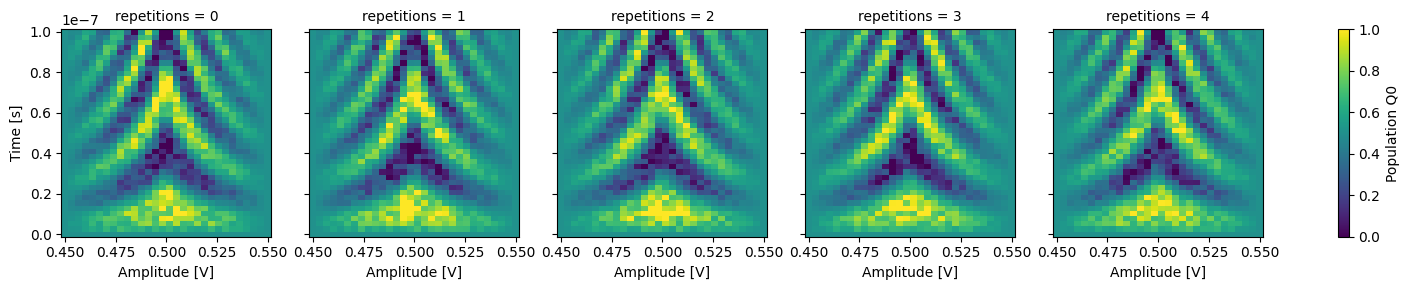

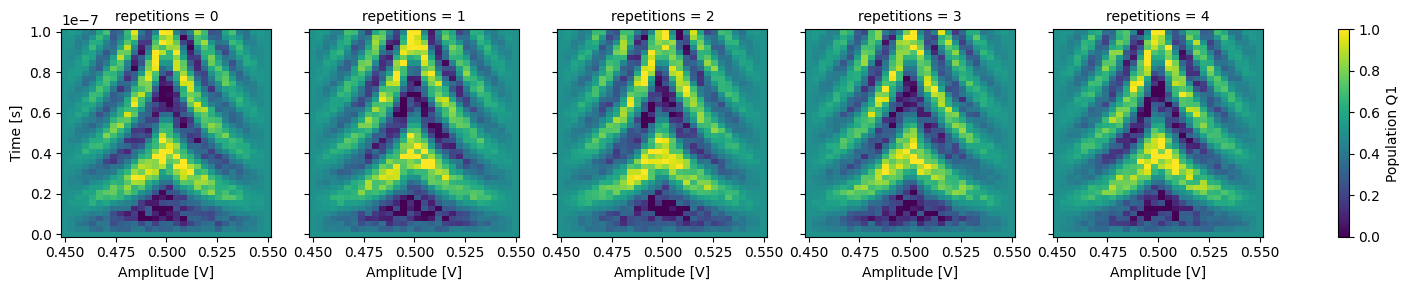

In [4]:
dataset_gridded = dh.to_gridded_dataset(
    dataset,
    dimension="main_dim",
    coords_names=dattrs.get_main_coords(dataset),
)
dataset_gridded.pop_q0.plot.pcolormesh(x="amp", col="repetitions")
_ = dataset_gridded.pop_q1.plot.pcolormesh(x="amp", col="repetitions")

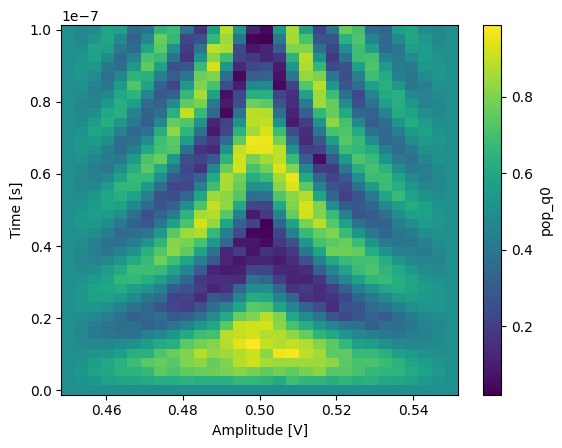

In [5]:
_ = dataset_gridded.pop_q0.mean(dim="repetitions").plot(x="amp")

In [6]:
coord_dims = ("repetitions",)
coord_values = ["A", "B", "C", "D", "E"]
dataset_indexed_rep = xr.Dataset(coords=dict(repetitions=(coord_dims, coord_values)))

dataset_indexed_rep

<xarray.Dataset>
Dimensions: (repetitions: 5)
Coordinates:
 * repetitions (repetitions) <U1 'A' 'B' 'C' 'D' 'E'
Data variables:
 *empty* xarray.Dataset Dimensions: repetitions : 5 Coordinates: (1) repetitions (repetitions) <U1 'A' 'B' 'C' 'D' 'E' array(['A', 'B', 'C', 'D', 'E'], dtype='<U1') Data variables: (0) Attributes: (0)

In [7]:
# merge with the previous dataset
dataset_rep = dataset_gridded.merge(dataset_indexed_rep, combine_attrs="drop_conflicts")

assert dataset_rep == round_trip_dataset(dataset_rep)  # confirm read/write

dataset_rep

<xarray.Dataset>
Dimensions: (amp: 30, time: 40, repetitions: 5)
Coordinates:
 * amp (amp) float64 0.45 0.4534 0.4569 0.4603 ... 0.5431 0.5466 0.55
 * time (time) float64 0.0 2.564e-09 5.128e-09 ... 9.744e-08 1e-07
 * repetitions (repetitions) <U1 'A' 'B' 'C' 'D' 'E'
Data variables:
 pop_q0 (repetitions, amp, time) float64 0.5 0.5 0.5 ... 0.5 0.5 0.5
 pop_q1 (repetitions, amp, time) float64 0.5 0.5 0.5 ... 0.5 0.5 0.5
Attributes:
 tuid: 20230926-194331-870-ca305f
 dataset_name: 
 dataset_state: None
 timestamp_start: None
 timestamp_end: None
 quantify_dataset_version: 2.0.0
 software_versions: {}
 relationships: []
 json_serialize_exclude: [] xarray.Dataset Dimensions: amp : 30 time : 40 repetitions : 5 Coordinates: (3) amp (amp) float64 0.45 0.4534 0.4569 ... 0.5466 0.55 is_dataset_ref : False is_main_coord : True json_serialize_exclude : [] long_name : Amplitude uniformly_spaced : True unit : V array([0.45 , 0.453448, 0.456897, 0.460345, 0.463793, 0.467241, 0.47069 ,
 0.474138, 0.477586, 0.481034, 0.484483, 0.487931, 0.491379, 0.494828,
 0.498276, 0.501724, 0.505172, 0.508621, 0.512069, 0.515517, 0.518966,
 0.522414, 0.525862, 0.52931 , 0.532759, 0.536207, 0.539655, 0.543103,
 0.546552, 0.55 ]) time (time) float64 0.0 2.564e-09 ... 9.744e-08 1e-07 is_dataset_ref : False is_main_coord : True json_serialize_exclude : [] long_name : Time uniformly_spaced : True unit : s array([0.000000e+00, 2.564103e-09, 5.128205e-09, 7.692308e-09, 1.025641e-08,
 1.282051e-08, 1.538462e-08, 1.794872e-08, 2.051282e-08, 2.307692e-08,
 2.564103e-08, 2.820513e-08, 3.076923e-08, 3.333333e-08, 3.589744e-08,
 3.846154e-08, 4.102564e-08, 4.358974e-08, 4.615385e-08, 4.871795e-08,
 5.128205e-08, 5.384615e-08, 5.641026e-08, 5.897436e-08, 6.153846e-08,
 6.410256e-08, 6.666667e-08, 6.923077e-08, 7.179487e-08, 7.435897e-08,
 7.692308e-08, 7.948718e-08, 8.205128e-08, 8.461538e-08, 8.717949e-08,
 8.974359e-08, 9.230769e-08, 9.487179e-08, 9.743590e-08, 1.000000e-07]) repetitions (repetitions) <U1 'A' 'B' 'C' 'D' 'E' array(['A', 'B', 'C', 'D', 'E'], dtype='<U1') Data variables: (2) pop_q0 (repetitions, amp, time) float64 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5 unit : long_name : Population Q0 is_main_var : True uniformly_spaced : True grid : True is_dataset_ref : False has_repetitions : True json_serialize_exclude : [] array([[[0.5 , 0.5 , 0.5 , ..., 0.5 ,
 0.5 , 0.5 ],
 [0.5 , 0.52462974, 0.54556513, ..., 0.49369154,
 0.46593909, 0.47829501],
 [0.5 , 0.53096479, 0.54671207, ..., 0.58439532,
 0.52840192, 0.48526448],
 ...,
 [0.5 , 0.53554992, 0.54556213, ..., 0.53421524,
 0.52683234, 0.47934742],
 [0.5 , 0.52263221, 0.53324799, ..., 0.49520272,
 0.48292625, 0.45911157],
 [0.5 , 0.5 , 0.5 , ..., 0.5 ,
 0.5 , 0.5 ]],

 [[0.5 , 0.5 , 0.5 , ..., 0.5 ,
 0.5 , 0.5 ],
 [0.5 , 0.511993 , 0.54040107, ..., 0.49323746,
 0.46472548, 0.4717735 ],
 [0.5 , 0.53839618, 0.59404155, ..., 0.57712699,
 0.52809145, 0.47479363],
...
 [0.5 , 0.5543903 , 0.56225336, ..., 0.55717664,
 0.54072803, 0.4903811 ],
 [0.5 , 0.51269098, 0.51747944, ..., 0.49306189,
 0.46207336, 0.45931355],
 [0.5 , 0.5 , 0.5 , ..., 0.5 ,
 0.5 , 0.5 ]],

 [[0.5 , 0.5 , 0.5 , ..., 0.5 ,
 0.5 , 0.5 ],
 [0.5 , 0.53282701, 0.53331208, ..., 0.49573131,
 0.46313136, 0.45196851],
 [0.5 , 0.52376577, 0.55784942, ..., 0.58932903,
 0.52031397, 0.47580372],
 ...,
 [0.5 , 0.53875118, 0.57789726, ..., 0.53942745,
 0.52059331, 0.48855559],
 [0.5 , 0.52515217, 0.54606107, ..., 0.49641976,
 0.46010524, 0.48175285],
 [0.5 , 0.5 , 0.5 , ..., 0.5 ,
 0.5 , 0.5 ]]]) pop_q1 (repetitions, amp, time) float64 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5 unit : long_name : Population Q1 is_main_var : True uniformly_spaced : True grid : True is_dataset_ref : False has_repetitions : True json_serialize_exclude : [] array([[[0.5 , 0.5 , 0.5 , ..., 0.5 ,
 0.5 , 0.5 ],
 [0.5 , 0.47119973, 0.47901959, ..., 0.50297437,
 0.51760087, 0.54529387],
 [0.5 , 0.44878307, 0.40519978, ..., 0.42239416,
 0.46766323, 0.52530065],
 ...,
 [0.5 , 0.44208814, 0.40902762, 

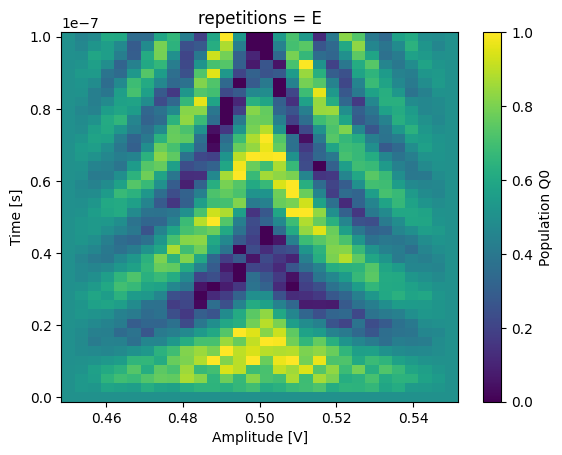

In [8]:
_ = dataset_rep.pop_q0.sel(repetitions="E").plot(x="amp")

In [9]:
for func in (mk_iq_shots, mk_trace_time, mk_trace_for_iq_shot):
    display_source_code(func)

def mk_iq_shots ( 
 num_shots : int = 128 , 
 sigmas : Union [ Tuple [ float ], np . ndarray ] = ( 0.1 , 0.1 ), 
 centers : Union [ Tuple [ complex ], np . ndarray ] = ( - 0.2 + 0.65 j , 0.7 + 4 j ), 
 probabilities : Union [ Tuple [ float ], np . ndarray ] = ( 0.4 , 0.6 ), 
 seed : Union [ int , None ] = 112233 , 
 ) -> np . ndarray : 
 """ 
 Generates clusters of (I + 1j*Q) points with a Gaussian distribution with the 
 specified sigmas and centers according to the probabilities of each cluster 

 .. admonition:: Examples 
 :class: dropdown 

 .. include:: examples/utilities.examples_support.mk_iq_shots.rst.txt 

 Parameters 
 ---------- 
 num_shots 
 The number of shot to generate. 
 sigma 
 The sigma of the Gaussian distribution used for both real and imaginary parts. 
 centers 
 The center of each cluster on the imaginary plane. 
 probabilities 
 The probabilities of each cluster being randomly selected for each shot. 
 seed 
 Random number generator seed passed to ``numpy.random.default_rng``. 
 """ 
 if not len ( sigmas ) == len ( centers ) == len ( probabilities ): 
 raise ValueError ( 
 f "Incorrect input. sigmas= { sigmas } , centers= { centers } and " 
 f "probabilities= { probabilities } must have the same length." 
 ) 

 rng = np . random . default_rng ( seed = seed ) 

 cluster_indices = tuple ( range ( len ( centers ))) 
 choices = rng . choice ( a = cluster_indices , size = num_shots , p = probabilities ) 

 shots = [] 
 for idx in cluster_indices : 
 num_shots_this_cluster = np . sum ( choices == idx ) 
 i_data = rng . normal ( 
 loc = centers [ idx ] . real , 
 scale = sigmas [ idx ], 
 size = num_shots_this_cluster , 
 ) 
 q_data = rng . normal ( 
 loc = centers [ idx ] . imag , 
 scale = sigmas [ idx ], 
 size = num_shots_this_cluster , 
 ) 
 shots . append ( i_data + 1 j * q_data ) 
 return np . concatenate ( shots )

def mk_trace_time ( sampling_rate : float = 1e9 , duration : float = 0.3e-6 ) -> np . ndarray : 
 """ 
 Generates a :obj:`~numpy.arange` in which the entries correspond to time instants 
 up to ``duration`` seconds sampled according to ``sampling_rate`` in Hz. 

 See :func:`~.mk_trace_for_iq_shot` for an usage example. 

 Parameters 
 ---------- 
 sampling_rate 
 The sampling rate in Hz. 
 duration 
 Total duration in seconds. 

 Returns 
 ------- 
 : 
 An array with the time instants. 
 """ 
 trace_length = sampling_rate * duration 
 return np . arange ( 0 , trace_length , 1 ) / sampling_rate

def mk_trace_for_iq_shot ( 
 iq_point : complex , 
 time_values : np . ndarray = mk_trace_time (), 
 intermediate_freq : float = 50e6 , 
 ) -> np . ndarray : 
 """ 
 Generates mock "traces" that a physical instrument would digitize for the readout of 
 a transmon qubit when using a down-converting IQ mixer. 

 .. admonition:: Examples 
 :class: dropdown 

 .. include:: /examples/utilities.examples_support.mk_trace_for_iq_shot.rst.txt 

 Parameters 
 ---------- 
 iq_point 
 A complex number representing a point on the IQ-plane. 
 time_values 
 The time instants at which the mock intermediate-frequency signal is sampled. 
 intermediate_freq 
 The intermediate frequency used in the down-conversion scheme. 

 Returns 
 ------- 
 : 
 An array of complex numbers. 
 """ # pylint: disable=line-too-long 

 return iq_point * np . exp ( 2.0 j * np . pi * intermediate_freq * time_values )

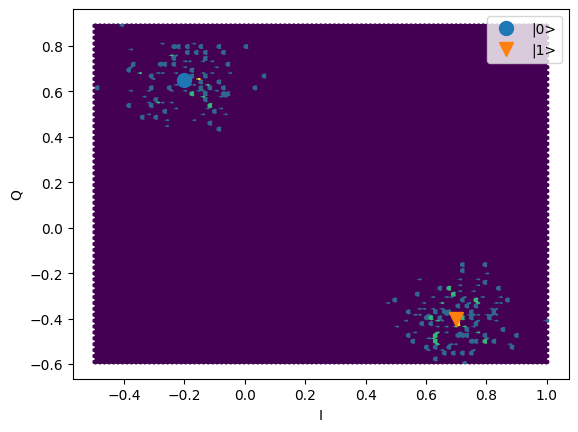

In [10]:
ground = -0.2 + 0.65j
excited = 0.7 - 0.4j
centers = ground, excited
sigmas = [0.1] * 2

shots = mk_iq_shots(
    num_shots=256,
    sigmas=sigmas,
    centers=centers,
    probabilities=[0.4, 1 - 0.4],
)

plt.hexbin(shots.real, shots.imag)
plt.xlabel("I")
plt.ylabel("Q")
_ = plot_complex_points(centers, ax=plt.gca())

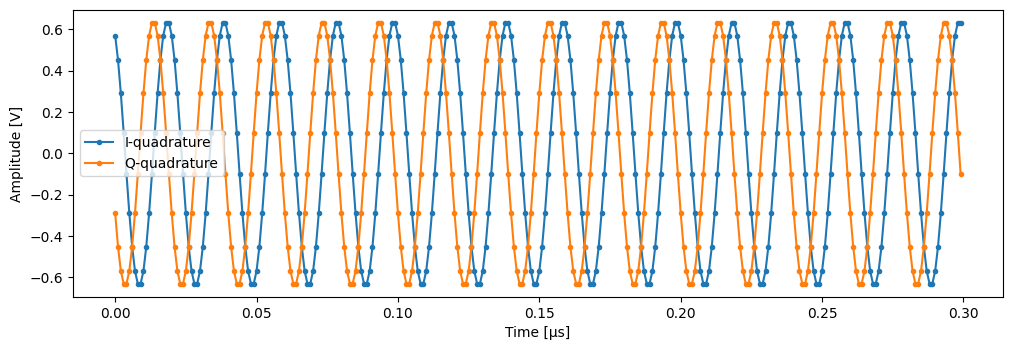

In [11]:
time = mk_trace_time()
trace = mk_trace_for_iq_shot(shots[0])

fig, ax = plt.subplots(1, 1, figsize=(12, 12 / 1.61 / 2))
ax.plot(time * 1e6, trace.imag, ".-", label="I-quadrature")
ax.plot(time * 1e6, trace.real, ".-", label="Q-quadrature")
ax.set_xlabel("Time [µs]")
ax.set_ylabel("Amplitude [V]")
_ = ax.legend()

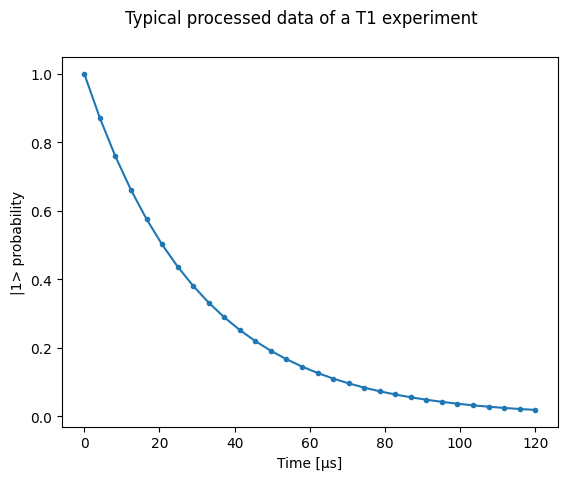

In [12]:
# parameters of our qubit model
tau = 30e-6
ground = -0.2 + 0.65j  # ground state on the IQ-plane
excited = 0.7 - 0.4j  # excited state on the IQ-plane
centers = ground, excited
sigmas = [0.1] * 2  # sigma, NB in general not the same for both state

# mock of data acquisition configuration
# NB usually at least 1000+ shots are taken, here we use less for faster code execution
num_shots = 256
# time delays between exciting the qubit and measuring its state
t1_times = np.linspace(0, 120e-6, 30)

# NB this are the ideal probabilities from repeating the measurement many times for a
# qubit with a lifetime given by tau
probabilities = exp_decay_func(t=t1_times, tau=tau, offset=0, n_factor=1, amplitude=1)

# Ideal experiment result
plt.ylabel("|1> probability")
plt.suptitle("Typical processed data of a T1 experiment")
plt.plot(t1_times * 1e6, probabilities, ".-")
_ = plt.xlabel("Time [µs]")

In [13]:
# convenience dict with the mock parameters
mock_conf = dict(
    num_shots=num_shots,
    centers=centers,
    sigmas=sigmas,
    t1_times=t1_times,
    probabilities=probabilities,
)

In [14]:
display_source_code(dataset_examples.mk_t1_av_dataset)

def mk_t1_av_dataset ( 
 t1_times : Optional [ np . ndarray ] = None , 
 probabilities : Optional [ np . ndarray ] = None , 
 ** kwargs , 
 ) -> xr . Dataset : 
 """ 
 Generates a dataset with mock data of a T1 experiment for a single qubit. 

 Parameters 
 ---------- 
 t1_times 
 Array with the T1 times corresponding to each probability in ``probabilities``. 
 probabilities 
 The probabilities of finding the qubit in the excited state. 
 **kwargs 
 Keyword arguments passed to 
 :func:`~quantify_core.utilities.examples_support.mk_iq_shots`. 
 """ 
 if t1_times is None : 
 t1_times = np . linspace ( 0 , 120e-6 , 30 ) 

 if probabilities is None : 
 probabilities = exp_decay_func ( 
 t = t1_times , tau = 50e-6 , offset = 0 , n_factor = 1 , amplitude = 1 
 ) 

 q0_iq_av = mk_shots_from_probabilities ( probabilities , ** kwargs ) . mean ( axis = 0 ) 

 main_dims = ( "main_dim" ,) 
 q0_attrs = mk_main_var_attrs ( unit = "V" , long_name = "Q0 IQ amplitude" ) 
 t1_time_attrs = mk_main_coord_attrs ( unit = "s" , long_name = "T1 Time" ) 

 data_vars = dict ( q0_iq_av = ( main_dims , q0_iq_av , q0_attrs )) 
 coords = dict ( t1_time = ( main_dims , t1_times , t1_time_attrs )) 

 dataset = xr . Dataset ( 
 data_vars = data_vars , 
 coords = coords , 
 attrs = mk_dataset_attrs (), 
 ) 
 return dataset

In [15]:
dataset = dataset_examples.mk_t1_av_dataset(**mock_conf)
assert dataset == round_trip_dataset(dataset)  # confirm read/write

dataset

<xarray.Dataset>
Dimensions: (main_dim: 30)
Coordinates:
 t1_time (main_dim) float64 0.0 4.138e-06 8.276e-06 ... 0.0001159 0.00012
Dimensions without coordinates: main_dim
Data variables:
 q0_iq_av (main_dim) complex128 (-0.19894114958423859+0.6515500138845804j...
Attributes:
 tuid: 20230926-194334-633-ce41ca
 dataset_name: 
 dataset_state: None
 timestamp_start: None
 timestamp_end: None
 quantify_dataset_version: 2.0.0
 software_versions: {}
 relationships: []
 json_serialize_exclude: [] xarray.Dataset Dimensions: main_dim : 30 Coordinates: (1) t1_time (main_dim) float64 0.0 4.138e-06 ... 0.0001159 0.00012 unit : s long_name : T1 Time is_main_coord : True uniformly_spaced : True is_dataset_ref : False json_serialize_exclude : [] array([0.00000000e+00, 4.13793103e-06, 8.27586207e-06, 1.24137931e-05,
 1.65517241e-05, 2.06896552e-05, 2.48275862e-05, 2.89655172e-05,
 3.31034483e-05, 3.72413793e-05, 4.13793103e-05, 4.55172414e-05,
 4.96551724e-05, 5.37931034e-05, 5.79310345e-05, 6.20689655e-05,
 6.62068966e-05, 7.03448276e-05, 7.44827586e-05, 7.86206897e-05,
 8.27586207e-05, 8.68965517e-05, 9.10344828e-05, 9.51724138e-05,
 9.93103448e-05, 1.03448276e-04, 1.07586207e-04, 1.11724138e-04,
 1.15862069e-04, 1.20000000e-04]) Data variables: (1) q0_iq_av (main_dim) complex128 (-0.19894114958423859+0.65155001... unit : V long_name : Q0 IQ amplitude is_main_var : True uniformly_spaced : True grid : True is_dataset_ref : False has_repetitions : False json_serialize_exclude : [] array([-0.19894115+0.65155001j, -0.11155212+0.54951255j,
 -0.01216713+0.43313537j, 0.05193768+0.35848368j,
 0.15504951+0.2389656j , 0.20661408+0.17861197j,
 0.2833043 +0.08961707j, 0.33361813+0.03110011j,
 0.37345395-0.01576696j, 0.40534772-0.05352011j,
 0.42151034-0.07261241j, 0.47040441-0.12912367j,
 0.49717119-0.16057795j, 0.53565518-0.20550725j,
 0.56438276-0.23892233j, 0.58075078-0.25822004j,
 0.59794213-0.27834108j, 0.60292187-0.28390675j,
 0.60292187-0.28390675j, 0.61706292-0.30039156j,
 0.6204547 -0.30436927j, 0.62775114-0.31283759j,
 0.64350021-0.33151635j, 0.64683289-0.33543496j,
 0.65442395-0.34419789j, 0.65442395-0.34419789j,
 0.65650831-0.34686819j, 0.66449532-0.35602708j,
 0.66901604-0.36113374j, 0.66901604-0.36113374j]) Attributes: (9) tuid : 20230926-194334-633-ce41ca dataset_name : dataset_state : None timestamp_start : None timestamp_end : None quantify_dataset_version : 2.0.0 software_versions : {} relationships : [] json_serialize_exclude : []

In [16]:
dataset.q0_iq_av.shape, dataset.q0_iq_av.dtype

((30,), dtype('complex128'))

In [17]:
dataset_gridded = dh.to_gridded_dataset(
    dataset,
    dimension="main_dim",
    coords_names=dattrs.get_main_coords(dataset),
)
dataset_gridded

<xarray.Dataset>
Dimensions: (t1_time: 30)
Coordinates:
 * t1_time (t1_time) float64 0.0 4.138e-06 8.276e-06 ... 0.0001159 0.00012
Data variables:
 q0_iq_av (t1_time) complex128 (-0.19894114958423859+0.6515500138845804j)...
Attributes:
 tuid: 20230926-194334-633-ce41ca
 dataset_name: 
 dataset_state: None
 timestamp_start: None
 timestamp_end: None
 quantify_dataset_version: 2.0.0
 software_versions: {}
 relationships: []
 json_serialize_exclude: [] xarray.Dataset Dimensions: t1_time : 30 Coordinates: (1) t1_time (t1_time) float64 0.0 4.138e-06 ... 0.0001159 0.00012 unit : s long_name : T1 Time is_main_coord : True uniformly_spaced : True is_dataset_ref : False json_serialize_exclude : [] array([0.000000e+00, 4.137931e-06, 8.275862e-06, 1.241379e-05, 1.655172e-05,
 2.068966e-05, 2.482759e-05, 2.896552e-05, 3.310345e-05, 3.724138e-05,
 4.137931e-05, 4.551724e-05, 4.965517e-05, 5.379310e-05, 5.793103e-05,
 6.206897e-05, 6.620690e-05, 7.034483e-05, 7.448276e-05, 7.862069e-05,
 8.275862e-05, 8.689655e-05, 9.103448e-05, 9.517241e-05, 9.931034e-05,
 1.034483e-04, 1.075862e-04, 1.117241e-04, 1.158621e-04, 1.200000e-04]) Data variables: (1) q0_iq_av (t1_time) complex128 (-0.19894114958423859+0.65155001... unit : V long_name : Q0 IQ amplitude is_main_var : True uniformly_spaced : True grid : True is_dataset_ref : False has_repetitions : False json_serialize_exclude : [] array([-0.19894115+0.65155001j, -0.11155212+0.54951255j,
 -0.01216713+0.43313537j, 0.05193768+0.35848368j,
 0.15504951+0.2389656j , 0.20661408+0.17861197j,
 0.2833043 +0.08961707j, 0.33361813+0.03110011j,
 0.37345395-0.01576696j, 0.40534772-0.05352011j,
 0.42151034-0.07261241j, 0.47040441-0.12912367j,
 0.49717119-0.16057795j, 0.53565518-0.20550725j,
 0.56438276-0.23892233j, 0.58075078-0.25822004j,
 0.59794213-0.27834108j, 0.60292187-0.28390675j,
 0.60292187-0.28390675j, 0.61706292-0.30039156j,
 0.6204547 -0.30436927j, 0.62775114-0.31283759j,
 0.64350021-0.33151635j, 0.64683289-0.33543496j,
 0.65442395-0.34419789j, 0.65442395-0.34419789j,
 0.65650831-0.34686819j, 0.66449532-0.35602708j,
 0.66901604-0.36113374j, 0.66901604-0.36113374j]) Attributes: (9) tuid : 20230926-194334-633-ce41ca dataset_name : dataset_state : None timestamp_start : None timestamp_end : None quantify_dataset_version : 2.0.0 software_versions : {} relationships : [] json_serialize_exclude : []

In [18]:
display_source_code(plot_xr_complex)
display_source_code(plot_xr_complex_on_plane)

def plot_xr_complex ( 
 var : xr . DataArray , 
 marker_scatter : str = "o" , 
 label_real : str = "Real" , 
 label_imag : str = "Imag" , 
 cmap : str = "viridis" , 
 c : np . ndarray = None , 
 kwargs_line : dict = None , 
 kwargs_scatter : dict = None , 
 title : str = " {} [ {} ]; shape = {} " , 
 legend : bool = True , 
 ax : object = None , 
 ) -> Tuple [ Figure , Axes ]: 
 """Plots the real and imaginary parts of complex data. Points are colored by default 
 according to their order in the array. 

 Parameters 
 ---------- 
 var 
 1D array of complex data. 
 marker_scatter 
 Marker used for the scatter plot. 
 label_real 
 Label for legend. 
 label_imag 
 Label for legend. 
 cmap 
 The colormap to use for coloring the points. 
 c 
 Color of the points. Defaults to an array of integers. 
 kwargs_line 
 Keyword arguments passed to :meth:`matplotlib.axes.Axes.plot`. 
 kwargs_scatter 
 Keyword arguments passed to :meth:`matplotlib.axes.Axes.scatter`. 
 title 
 Axes title. By default gets formatted with ``var.long_name``, ``var.name`` and 
 var.shape``. 
 legend 
 Calls :meth:`~matplotlib.axes.Axes.legend` if ``True``. 
 ax 
 The matplotlib axes. If ``None`` a new axes (and figure) is created. 
 """ 

 if ax is None : 
 _ , ax = plt . subplots () 

 if c is None : 
 c = np . arange ( len ( var )) 

 if kwargs_line is None : 
 kwargs_line = {} 

 if kwargs_scatter is None : 
 kwargs_scatter = {} 

 if "marker" not in kwargs_line : 
 kwargs_line [ "marker" ] = "" 

 var . real . plot ( ax = ax , label = label_real , ** kwargs_line ) 
 var . imag . plot ( ax = ax , label = label_imag , ** kwargs_line ) 

 for vals in ( var . real , var . imag ): 
 ax . scatter ( 
 next ( iter ( var . coords . values ())) . values , 
 vals , 
 marker = marker_scatter , 
 c = c , 
 cmap = cmap , 
 ** kwargs_scatter , 
 ) 

 ax . set_title ( title . format ( var . long_name , var . name , var . shape )) 

 if legend : 
 ax . legend () 

 return ax . get_figure (), ax

def plot_xr_complex_on_plane ( 
 var : xr . DataArray , 
 marker : str = "o" , 
 label : str = "Data on imaginary plane" , 
 cmap : str = "viridis" , 
 c : np . ndarray = None , 
 xlabel : str = "Real {}{}{} " , 
 ylabel : str = "Imag {}{}{} " , 
 legend : bool = True , 
 ax : object = None , 
 ** kwargs , 
 ) -> Tuple [ Figure , Axes ]: 
 """Plots complex data on the imaginary plane. Points are colored by default 
 according to their order in the array. 


 Parameters 
 ---------- 
 var 
 1D array of complex data. 
 marker 
 Marker used for the scatter plot. 
 label 
 Data label for the legend. 
 cmap 
 The colormap to use for coloring the points. 
 c 
 Color of the points. Defaults to an array of integers. 
 xlabel 
 Label o x axes. 
 ylabel 
 Label o y axes. 
 legend 
 Calls :meth:`~matplotlib.axes.Axes.legend` if ``True``. 
 ax 
 The matplotlib axes. If ``None`` a new axes (and figure) is created. 
 """ 

 if ax is None : 
 _ , ax = plt . subplots () 

 if c is None : 
 c = np . arange ( 0 , len ( var )) 

 ax . scatter ( var . real , var . imag , marker = marker , label = label , c = c , cmap = cmap , ** kwargs ) 

 unit_str = get_unit_from_attrs ( var ) 
 ax . set_xlabel ( xlabel . format ( " " , var . name , unit_str )) 
 ax . set_ylabel ( ylabel . format ( " " , var . name , unit_str )) 

 if legend : 
 ax . legend () 

 return ax . get_figure (), ax

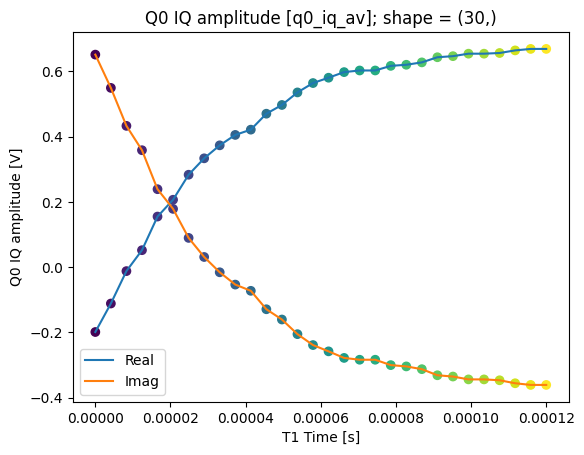

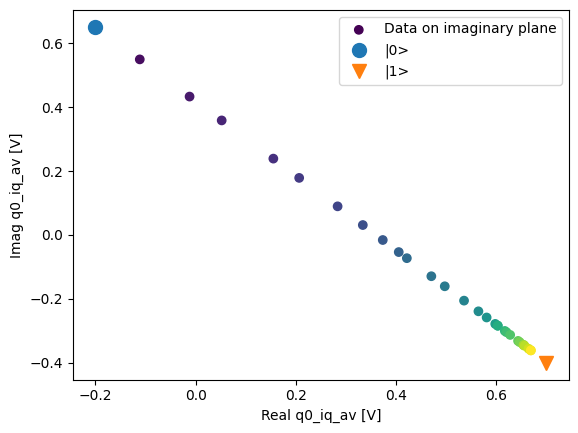

In [19]:
plot_xr_complex(dataset_gridded.q0_iq_av)
fig, ax = plot_xr_complex_on_plane(dataset_gridded.q0_iq_av)
_ = plot_complex_points(centers, ax=ax)

In [20]:
display_source_code(dataset_examples.mk_t1_av_with_cal_dataset)

def mk_t1_av_with_cal_dataset ( 
 t1_times : Optional [ np . ndarray ] = None , 
 probabilities : Optional [ np . ndarray ] = None , 
 ** kwargs , 
 ) -> xr . Dataset : 
 """ 
 Generates a dataset with mock data of a T1 experiment for a single qubit including 
 calibration points for the ground and excited states. 

 Parameters 
 ---------- 
 t1_times 
 Array with the T1 times corresponding to each probability in ``probabilities``. 
 probabilities 
 The probabilities of finding the qubit in the excited state. 
 **kwargs 
 Keyword arguments passed to 
 :func:`~quantify_core.utilities.examples_support.mk_iq_shots`. 
 """ 
 # reuse previous dataset 
 dataset_av = mk_t1_av_dataset ( t1_times , probabilities , ** kwargs ) 

 # generate mock calibration data for the ground and excited states 
 q0_iq_av_cal = mk_shots_from_probabilities ([ 0 , 1 ], ** kwargs ) . mean ( axis = 0 ) 

 secondary_dims = ( "cal_dim" ,) 
 q0_cal_attrs = mk_secondary_var_attrs ( unit = "V" , long_name = "Q0 IQ Calibration" ) 
 cal_attrs = mk_secondary_coord_attrs ( unit = "" , long_name = "Q0 state" ) 

 relationships = [ 
 dattrs . QDatasetIntraRelationship ( 
 item_name = dataset_av . q0_iq_av . name , # name of a variable in the dataset 
 relation_type = "calibration" , 
 related_names = [ "q0_iq_av_cal" ], # the secondary variable in the dataset 
 ) . to_dict () 
 ] 

 data_vars = dict ( 
 q0_iq_av = dataset_av . q0_iq_av , # reuse from the other dataset 
 q0_iq_av_cal = ( secondary_dims , q0_iq_av_cal , q0_cal_attrs ), 
 ) 
 coords = dict ( 
 t1_time = dataset_av . t1_time , # reuse from the other dataset 
 cal = ( secondary_dims , [ "|0>" , "|1>" ], cal_attrs ), # coords can be strings 
 ) 

 dataset = xr . Dataset ( 
 data_vars = data_vars , 
 coords = coords , 
 attrs = mk_dataset_attrs ( relationships = relationships ), # relationships added here 
 ) 

 return dataset

In [21]:
dataset = dataset_examples.mk_t1_av_with_cal_dataset(**mock_conf)
assert dataset == round_trip_dataset(dataset)  # confirm read/write

dataset

<xarray.Dataset>
Dimensions: (main_dim: 30, cal_dim: 2)
Coordinates:
 t1_time (main_dim) float64 0.0 4.138e-06 ... 0.0001159 0.00012
 cal (cal_dim) <U3 '|0>' '|1>'
Dimensions without coordinates: main_dim, cal_dim
Data variables:
 q0_iq_av (main_dim) complex128 (-0.19894114958423859+0.6515500138845...
 q0_iq_av_cal (cal_dim) complex128 (0.7010588504157614-0.3984499861154196...
Attributes:
 tuid: 20230926-194335-122-ca5251
 dataset_name: 
 dataset_state: None
 timestamp_start: None
 timestamp_end: None
 quantify_dataset_version: 2.0.0
 software_versions: {}
 relationships: [{'item_name': 'q0_iq_av', 'relation_type': 'c...
 json_serialize_exclude: [] xarray.Dataset Dimensions: main_dim : 30 cal_dim : 2 Coordinates: (2) t1_time (main_dim) float64 0.0 4.138e-06 ... 0.0001159 0.00012 unit : s long_name : T1 Time is_main_coord : True uniformly_spaced : True is_dataset_ref : False json_serialize_exclude : [] array([0.00000000e+00, 4.13793103e-06, 8.27586207e-06, 1.24137931e-05,
 1.65517241e-05, 2.06896552e-05, 2.48275862e-05, 2.89655172e-05,
 3.31034483e-05, 3.72413793e-05, 4.13793103e-05, 4.55172414e-05,
 4.96551724e-05, 5.37931034e-05, 5.79310345e-05, 6.20689655e-05,
 6.62068966e-05, 7.03448276e-05, 7.44827586e-05, 7.86206897e-05,
 8.27586207e-05, 8.68965517e-05, 9.10344828e-05, 9.51724138e-05,
 9.93103448e-05, 1.03448276e-04, 1.07586207e-04, 1.11724138e-04,
 1.15862069e-04, 1.20000000e-04]) cal (cal_dim) <U3 '|0>' '|1>' unit : long_name : Q0 state is_main_coord : False uniformly_spaced : True is_dataset_ref : False json_serialize_exclude : [] array(['|0>', '|1>'], dtype='<U3') Data variables: (2) q0_iq_av (main_dim) complex128 (-0.19894114958423859+0.65155001... unit : V long_name : Q0 IQ amplitude is_main_var : True uniformly_spaced : True grid : True is_dataset_ref : False has_repetitions : False json_serialize_exclude : [] array([-0.19894115+0.65155001j, -0.11155212+0.54951255j,
 -0.01216713+0.43313537j, 0.05193768+0.35848368j,
 0.15504951+0.2389656j , 0.20661408+0.17861197j,
 0.2833043 +0.08961707j, 0.33361813+0.03110011j,
 0.37345395-0.01576696j, 0.40534772-0.05352011j,
 0.42151034-0.07261241j, 0.47040441-0.12912367j,
 0.49717119-0.16057795j, 0.53565518-0.20550725j,
 0.56438276-0.23892233j, 0.58075078-0.25822004j,
 0.59794213-0.27834108j, 0.60292187-0.28390675j,
 0.60292187-0.28390675j, 0.61706292-0.30039156j,
 0.6204547 -0.30436927j, 0.62775114-0.31283759j,
 0.64350021-0.33151635j, 0.64683289-0.33543496j,
 0.65442395-0.34419789j, 0.65442395-0.34419789j,
 0.65650831-0.34686819j, 0.66449532-0.35602708j,
 0.66901604-0.36113374j, 0.66901604-0.36113374j]) q0_iq_av_cal (cal_dim) complex128 (0.7010588504157614-0.3984499861... unit : V long_name : Q0 IQ Calibration is_main_var : False uniformly_spaced : True grid : True is_dataset_ref : False has_repetitions : False json_serialize_exclude : [] array([ 0.70105885-0.39844999j, -0.19894115+0.65155001j]) Attributes: (9) tuid : 20230926-194335-122-ca5251 dataset_name : dataset_state : None timestamp_start : None timestamp_end : None quantify_dataset_version : 2.0.0 software_versions : {} relationships : [{'item_name': 'q0_iq_av', 'relation_type': 'calibration', 'related_names': ['q0_iq_av_cal'], 'relation_metadata': {}}] json_serialize_exclude : []

In [22]:
dattrs.get_main_dims(dataset), dattrs.get_secondary_dims(dataset)

(['main_dim'], ['cal_dim'])

In [23]:
dataset.relationships

[
    {
        'item_name': 'q0_iq_av',
        'relation_type': 'calibration',
        'related_names': ['q0_iq_av_cal'],
        'relation_metadata': {}
    }
]

In [24]:
dataset_gridded = dh.to_gridded_dataset(
    dataset,
    dimension="main_dim",
    coords_names=dattrs.get_main_coords(dataset),
)
dataset_gridded = dh.to_gridded_dataset(
    dataset_gridded,
    dimension="cal_dim",
    coords_names=dattrs.get_secondary_coords(dataset_gridded),
)
dataset_gridded

<xarray.Dataset>
Dimensions: (t1_time: 30, cal: 2)
Coordinates:
 * t1_time (t1_time) float64 0.0 4.138e-06 ... 0.0001159 0.00012
 * cal (cal) <U3 '|0>' '|1>'
Data variables:
 q0_iq_av (t1_time) complex128 (-0.19894114958423859+0.65155001388458...
 q0_iq_av_cal (cal) complex128 (0.7010588504157614-0.3984499861154196j) (...
Attributes:
 tuid: 20230926-194335-122-ca5251
 dataset_name: 
 dataset_state: None
 timestamp_start: None
 timestamp_end: None
 quantify_dataset_version: 2.0.0
 software_versions: {}
 relationships: [{'item_name': 'q0_iq_av', 'relation_type': 'c...
 json_serialize_exclude: [] xarray.Dataset Dimensions: t1_time : 30 cal : 2 Coordinates: (2) t1_time (t1_time) float64 0.0 4.138e-06 ... 0.0001159 0.00012 unit : s long_name : T1 Time is_main_coord : True uniformly_spaced : True is_dataset_ref : False json_serialize_exclude : [] array([0.000000e+00, 4.137931e-06, 8.275862e-06, 1.241379e-05, 1.655172e-05,
 2.068966e-05, 2.482759e-05, 2.896552e-05, 3.310345e-05, 3.724138e-05,
 4.137931e-05, 4.551724e-05, 4.965517e-05, 5.379310e-05, 5.793103e-05,
 6.206897e-05, 6.620690e-05, 7.034483e-05, 7.448276e-05, 7.862069e-05,
 8.275862e-05, 8.689655e-05, 9.103448e-05, 9.517241e-05, 9.931034e-05,
 1.034483e-04, 1.075862e-04, 1.117241e-04, 1.158621e-04, 1.200000e-04]) cal (cal) <U3 '|0>' '|1>' unit : long_name : Q0 state is_main_coord : False uniformly_spaced : True is_dataset_ref : False json_serialize_exclude : [] array(['|0>', '|1>'], dtype='<U3') Data variables: (2) q0_iq_av (t1_time) complex128 (-0.19894114958423859+0.65155001... unit : V long_name : Q0 IQ amplitude is_main_var : True uniformly_spaced : True grid : True is_dataset_ref : False has_repetitions : False json_serialize_exclude : [] array([-0.19894115+0.65155001j, -0.11155212+0.54951255j,
 -0.01216713+0.43313537j, 0.05193768+0.35848368j,
 0.15504951+0.2389656j , 0.20661408+0.17861197j,
 0.2833043 +0.08961707j, 0.33361813+0.03110011j,
 0.37345395-0.01576696j, 0.40534772-0.05352011j,
 0.42151034-0.07261241j, 0.47040441-0.12912367j,
 0.49717119-0.16057795j, 0.53565518-0.20550725j,
 0.56438276-0.23892233j, 0.58075078-0.25822004j,
 0.59794213-0.27834108j, 0.60292187-0.28390675j,
 0.60292187-0.28390675j, 0.61706292-0.30039156j,
 0.6204547 -0.30436927j, 0.62775114-0.31283759j,
 0.64350021-0.33151635j, 0.64683289-0.33543496j,
 0.65442395-0.34419789j, 0.65442395-0.34419789j,
 0.65650831-0.34686819j, 0.66449532-0.35602708j,
 0.66901604-0.36113374j, 0.66901604-0.36113374j]) q0_iq_av_cal (cal) complex128 (0.7010588504157614-0.3984499861... unit : V long_name : Q0 IQ Calibration is_main_var : False uniformly_spaced : True grid : True is_dataset_ref : False has_repetitions : False json_serialize_exclude : [] array([ 0.70105885-0.39844999j, -0.19894115+0.65155001j]) Attributes: (9) tuid : 20230926-194335-122-ca5251 dataset_name : dataset_state : None timestamp_start : None timestamp_end : None quantify_dataset_version : 2.0.0 software_versions : {} relationships : [{'item_name': 'q0_iq_av', 'relation_type': 'calibration', 'related_names': ['q0_iq_av_cal'], 'relation_metadata': {}}] json_serialize_exclude : []

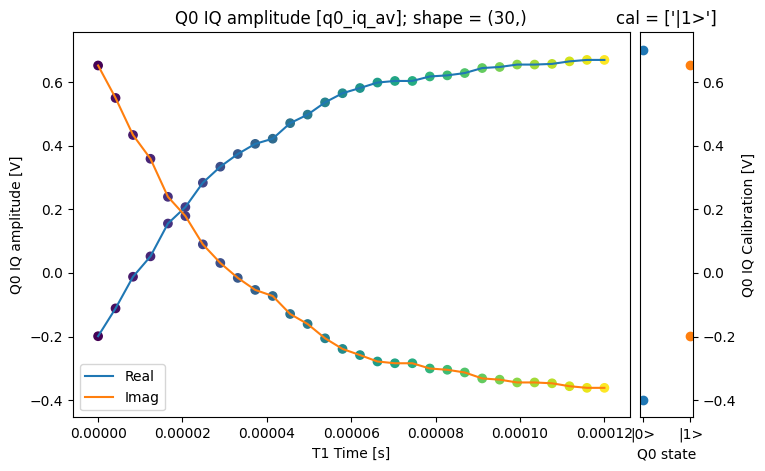

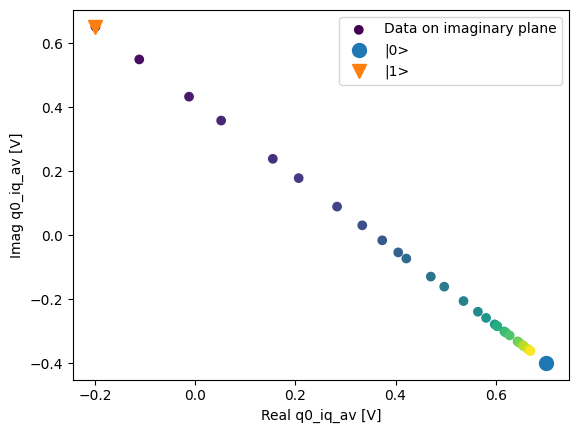

In [25]:
fig = plt.figure(figsize=(8, 5))

ax = plt.subplot2grid((1, 10), (0, 0), colspan=9, fig=fig)
plot_xr_complex(dataset_gridded.q0_iq_av, ax=ax)

ax_calib = plt.subplot2grid((1, 10), (0, 9), colspan=1, fig=fig, sharey=ax)
for i, color in zip(
    range(2), ["C0", "C1"]
):  # plot each calibration point with same color
    dataset_gridded.q0_iq_av_cal.real[i : i + 1].plot.line(
        marker="o", ax=ax_calib, linestyle="", color=color
    )
    dataset_gridded.q0_iq_av_cal.imag[i : i + 1].plot.line(
        marker="o", ax=ax_calib, linestyle="", color=color
    )
ax_calib.yaxis.set_label_position("right")
ax_calib.yaxis.tick_right()

fig, ax = plot_xr_complex_on_plane(dataset_gridded.q0_iq_av)
_ = plot_complex_points(dataset_gridded.q0_iq_av_cal.values, ax=ax)

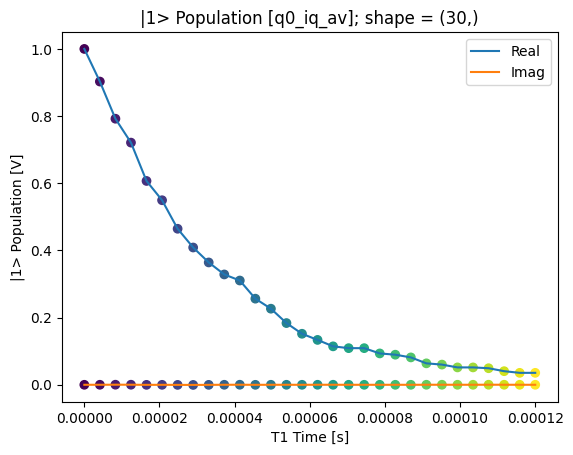

In [26]:
rotated_and_normalized = rotate_to_calibrated_axis(
    dataset_gridded.q0_iq_av.values, *dataset_gridded.q0_iq_av_cal.values
)
rotated_and_normalized_da = xr.DataArray(dataset_gridded.q0_iq_av)
rotated_and_normalized_da.values = rotated_and_normalized
rotated_and_normalized_da.attrs["long_name"] = "|1> Population"
rotated_and_normalized_da.attrs["units"] = ""
_ = plot_xr_complex(rotated_and_normalized_da)

In [27]:
display_source_code(dataset_examples.mk_t1_shots_dataset)

def mk_t1_shots_dataset ( 
 t1_times : Optional [ np . ndarray ] = None , 
 probabilities : Optional [ np . ndarray ] = None , 
 ** kwargs , 
 ) -> xr . Dataset : 
 """ 
 Generates a dataset with mock data of a T1 experiment for a single qubit including 
 calibration points for the ground and excited states, including all the individual 
 shots (repeated qubit state measurement for the same exact experiment). 

 Parameters 
 ---------- 
 t1_times 
 Array with the T1 times corresponding to each probability in ``probabilities``. 
 probabilities 
 The probabilities of finding the qubit in the excited state. 
 **kwargs 
 Keyword arguments passed to 
 :func:`~quantify_core.utilities.examples_support.mk_iq_shots`. 
 """ 
 # reuse previous dataset 
 dataset_av_with_cal = mk_t1_av_with_cal_dataset ( t1_times , probabilities , ** kwargs ) 
 if probabilities is None : 
 probabilities = dataset_av_with_cal . q0_iq_av . values 
 probabilities = rotate_to_calibrated_axis ( 
 probabilities , * dataset_av_with_cal . q0_iq_av_cal . values 
 ) . real 
 # generate mock data containing all the shots, 
 # NB not the same data that was used for the average above, but this is just a mock 
 q0_iq_shots = mk_shots_from_probabilities ( probabilities , ** kwargs ) 
 q0_iq_shots_cal = mk_shots_from_probabilities ([ 0 , 1 ], ** kwargs ) 

 # the xarray dimensions will now require an outer repetitions dimension 
 secondary_dims_rep = ( "repetitions" , "cal_dim" ) 
 main_dims_rep = ( "repetitions" , "main_dim" ) 

 relationships = [ 
 dattrs . QDatasetIntraRelationship ( 
 item_name = dataset_av_with_cal . q0_iq_av . name , 
 relation_type = "calibration" , 
 related_names = [ dataset_av_with_cal . q0_iq_av_cal . name ], 
 ) . to_dict (), 
 dattrs . QDatasetIntraRelationship ( 
 item_name = "q0_iq_shots" , 
 relation_type = "calibration" , 
 related_names = [ "q0_iq_cal_shots" ], 
 ) . to_dict (), 
 # suggestion of a custom relationship 
 dattrs . QDatasetIntraRelationship ( 
 item_name = dataset_av_with_cal . q0_iq_av . name , 
 relation_type = "individual_shots" , 
 related_names = [ "q0_iq_shots" ], 
 ) . to_dict (), 
 ] 

 # Flag that these variables use a repetitions dimension 
 q0_attrs_rep = dict ( dataset_av_with_cal . q0_iq_av . attrs ) 
 q0_attrs_rep [ "has_repetitions" ] = True 
 q0_cal_attrs_rep = dict ( dataset_av_with_cal . q0_iq_av_cal . attrs ) 
 q0_cal_attrs_rep [ "has_repetitions" ] = True 

 data_vars = dict ( 
 # variables that are the same as in the previous dataset, and are now redundant, 
 # however, we include them to showcase the dataset flexibility 
 q0_iq_av = dataset_av_with_cal . q0_iq_av , 
 q0_iq_av_cal = dataset_av_with_cal . q0_iq_av_cal , 
 # variables that contain all the individual shots 
 q0_iq_shots = ( main_dims_rep , q0_iq_shots , q0_attrs_rep ), 
 q0_iq_shots_cal = ( secondary_dims_rep , q0_iq_shots_cal , q0_cal_attrs_rep ), 
 ) 

 dataset = xr . Dataset ( 
 data_vars = data_vars , 
 coords = dataset_av_with_cal . coords , # same coordinates as in previous dataset 
 attrs = mk_dataset_attrs ( relationships = relationships ), # relationships added here 
 ) 

 return dataset

In [28]:
dataset = dataset_examples.mk_t1_shots_dataset(**mock_conf)
dataset

<xarray.Dataset>
Dimensions: (main_dim: 30, cal_dim: 2, repetitions: 256)
Coordinates:
 t1_time (main_dim) float64 0.0 4.138e-06 ... 0.0001159 0.00012
 cal (cal_dim) <U3 '|0>' '|1>'
Dimensions without coordinates: main_dim, cal_dim, repetitions
Data variables:
 q0_iq_av (main_dim) complex128 (-0.19894114958423859+0.6515500138...
 q0_iq_av_cal (cal_dim) complex128 (0.7010588504157614-0.3984499861154...
 q0_iq_shots (repetitions, main_dim) complex128 (-0.289836545355741+0...
 q0_iq_shots_cal (repetitions, cal_dim) complex128 (0.610163454644259-0.4...
Attributes:
 tuid: 20230926-194335-919-29ea05
 dataset_name: 
 dataset_state: None
 timestamp_start: None
 timestamp_end: None
 quantify_dataset_version: 2.0.0
 software_versions: {}
 relationships: [{'item_name': 'q0_iq_av', 'relation_type': 'c...
 json_serialize_exclude: [] xarray.Dataset Dimensions: main_dim : 30 cal_dim : 2 repetitions : 256 Coordinates: (2) t1_time (main_dim) float64 0.0 4.138e-06 ... 0.0001159 0.00012 unit : s long_name : T1 Time is_main_coord : True uniformly_spaced : True is_dataset_ref : False json_serialize_exclude : [] array([0.00000000e+00, 4.13793103e-06, 8.27586207e-06, 1.24137931e-05,
 1.65517241e-05, 2.06896552e-05, 2.48275862e-05, 2.89655172e-05,
 3.31034483e-05, 3.72413793e-05, 4.13793103e-05, 4.55172414e-05,
 4.96551724e-05, 5.37931034e-05, 5.79310345e-05, 6.20689655e-05,
 6.62068966e-05, 7.03448276e-05, 7.44827586e-05, 7.86206897e-05,
 8.27586207e-05, 8.68965517e-05, 9.10344828e-05, 9.51724138e-05,
 9.93103448e-05, 1.03448276e-04, 1.07586207e-04, 1.11724138e-04,
 1.15862069e-04, 1.20000000e-04]) cal (cal_dim) <U3 '|0>' '|1>' unit : long_name : Q0 state is_main_coord : False uniformly_spaced : True is_dataset_ref : False json_serialize_exclude : [] array(['|0>', '|1>'], dtype='<U3') Data variables: (4) q0_iq_av (main_dim) complex128 (-0.19894114958423859+0.65155001... unit : V long_name : Q0 IQ amplitude is_main_var : True uniformly_spaced : True grid : True is_dataset_ref : False has_repetitions : False json_serialize_exclude : [] array([-0.19894115+0.65155001j, -0.11155212+0.54951255j,
 -0.01216713+0.43313537j, 0.05193768+0.35848368j,
 0.15504951+0.2389656j , 0.20661408+0.17861197j,
 0.2833043 +0.08961707j, 0.33361813+0.03110011j,
 0.37345395-0.01576696j, 0.40534772-0.05352011j,
 0.42151034-0.07261241j, 0.47040441-0.12912367j,
 0.49717119-0.16057795j, 0.53565518-0.20550725j,
 0.56438276-0.23892233j, 0.58075078-0.25822004j,
 0.59794213-0.27834108j, 0.60292187-0.28390675j,
 0.60292187-0.28390675j, 0.61706292-0.30039156j,
 0.6204547 -0.30436927j, 0.62775114-0.31283759j,
 0.64350021-0.33151635j, 0.64683289-0.33543496j,
 0.65442395-0.34419789j, 0.65442395-0.34419789j,
 0.65650831-0.34686819j, 0.66449532-0.35602708j,
 0.66901604-0.36113374j, 0.66901604-0.36113374j]) q0_iq_av_cal (cal_dim) complex128 (0.7010588504157614-0.3984499861... unit : V long_name : Q0 IQ Calibration is_main_var : False uniformly_spaced : True grid : True is_dataset_ref : False has_repetitions : False json_serialize_exclude : [] array([ 0.70105885-0.39844999j, -0.19894115+0.65155001j]) q0_iq_shots (repetitions, main_dim) complex128 (-0.289836545355741+0.6397419222... unit : V long_name : Q0 IQ amplitude is_main_var : True uniformly_spaced : True grid : True is_dataset_ref : False has_repetitions : True json_serialize_exclude : [] array([[-0.28983655+0.63974192j, -0.28983655+0.56980106j,
 -0.28983655+0.53688137j, ..., -0.28983655+0.7151281j ,
 -0.28983655+0.78818874j, -0.28983655+0.78818874j],
 [-0.24253459+0.62214896j, -0.24253459+0.5353232j ,
 -0.24253459+0.59304477j, ..., -0.24253459+0.66518369j,
 -0.24253459+0.7151281j , -0.24253459+0.7151281j ],
 [-0.28481752+0.67074703j, -0.28481752+0.62934539j,
 -0.28481752+0.62319817j, ..., -0.28481752+0.77120226j,
 -0.28481752+0.66518369j, -0.28481752+0.66518369j],
 ...,
 [-0.1585822 +0.54251043j, 0.69005581-0.50748957j,
 0.6904154 -0.50748957j, ..., 0.72225129-0.50748957j,
 0.63121489-0.50748957j, 0.63121489-0.50748957j],
 [-0.13095023+

In [29]:
dataset_gridded = dh.to_gridded_dataset(
    dataset,
    dimension="main_dim",
    coords_names=dattrs.get_main_coords(dataset),
)
dataset_gridded = dh.to_gridded_dataset(
    dataset_gridded,
    dimension="cal_dim",
    coords_names=dattrs.get_secondary_coords(dataset_gridded),
)
dataset_gridded

<xarray.Dataset>
Dimensions: (t1_time: 30, cal: 2, repetitions: 256)
Coordinates:
 * t1_time (t1_time) float64 0.0 4.138e-06 ... 0.0001159 0.00012
 * cal (cal) <U3 '|0>' '|1>'
Dimensions without coordinates: repetitions
Data variables:
 q0_iq_av (t1_time) complex128 (-0.19894114958423859+0.65155001388...
 q0_iq_av_cal (cal) complex128 (0.7010588504157614-0.3984499861154196j...
 q0_iq_shots (repetitions, t1_time) complex128 (-0.289836545355741+0....
 q0_iq_shots_cal (repetitions, cal) complex128 (0.610163454644259-0.41025...
Attributes:
 tuid: 20230926-194335-919-29ea05
 dataset_name: 
 dataset_state: None
 timestamp_start: None
 timestamp_end: None
 quantify_dataset_version: 2.0.0
 software_versions: {}
 relationships: [{'item_name': 'q0_iq_av', 'relation_type': 'c...
 json_serialize_exclude: [] xarray.Dataset Dimensions: t1_time : 30 cal : 2 repetitions : 256 Coordinates: (2) t1_time (t1_time) float64 0.0 4.138e-06 ... 0.0001159 0.00012 unit : s long_name : T1 Time is_main_coord : True uniformly_spaced : True is_dataset_ref : False json_serialize_exclude : [] array([0.000000e+00, 4.137931e-06, 8.275862e-06, 1.241379e-05, 1.655172e-05,
 2.068966e-05, 2.482759e-05, 2.896552e-05, 3.310345e-05, 3.724138e-05,
 4.137931e-05, 4.551724e-05, 4.965517e-05, 5.379310e-05, 5.793103e-05,
 6.206897e-05, 6.620690e-05, 7.034483e-05, 7.448276e-05, 7.862069e-05,
 8.275862e-05, 8.689655e-05, 9.103448e-05, 9.517241e-05, 9.931034e-05,
 1.034483e-04, 1.075862e-04, 1.117241e-04, 1.158621e-04, 1.200000e-04]) cal (cal) <U3 '|0>' '|1>' unit : long_name : Q0 state is_main_coord : False uniformly_spaced : True is_dataset_ref : False json_serialize_exclude : [] array(['|0>', '|1>'], dtype='<U3') Data variables: (4) q0_iq_av (t1_time) complex128 (-0.19894114958423859+0.65155001... unit : V long_name : Q0 IQ amplitude is_main_var : True uniformly_spaced : True grid : True is_dataset_ref : False has_repetitions : False json_serialize_exclude : [] array([-0.19894115+0.65155001j, -0.11155212+0.54951255j,
 -0.01216713+0.43313537j, 0.05193768+0.35848368j,
 0.15504951+0.2389656j , 0.20661408+0.17861197j,
 0.2833043 +0.08961707j, 0.33361813+0.03110011j,
 0.37345395-0.01576696j, 0.40534772-0.05352011j,
 0.42151034-0.07261241j, 0.47040441-0.12912367j,
 0.49717119-0.16057795j, 0.53565518-0.20550725j,
 0.56438276-0.23892233j, 0.58075078-0.25822004j,
 0.59794213-0.27834108j, 0.60292187-0.28390675j,
 0.60292187-0.28390675j, 0.61706292-0.30039156j,
 0.6204547 -0.30436927j, 0.62775114-0.31283759j,
 0.64350021-0.33151635j, 0.64683289-0.33543496j,
 0.65442395-0.34419789j, 0.65442395-0.34419789j,
 0.65650831-0.34686819j, 0.66449532-0.35602708j,
 0.66901604-0.36113374j, 0.66901604-0.36113374j]) q0_iq_av_cal (cal) complex128 (0.7010588504157614-0.3984499861... unit : V long_name : Q0 IQ Calibration is_main_var : False uniformly_spaced : True grid : True is_dataset_ref : False has_repetitions : False json_serialize_exclude : [] array([ 0.70105885-0.39844999j, -0.19894115+0.65155001j]) q0_iq_shots (repetitions, t1_time) complex128 (-0.289836545355741+0.6397419222... unit : V long_name : Q0 IQ amplitude is_main_var : True uniformly_spaced : True grid : True is_dataset_ref : False has_repetitions : True json_serialize_exclude : [] array([[-0.28983655+0.63974192j, -0.28983655+0.56980106j,
 -0.28983655+0.53688137j, ..., -0.28983655+0.7151281j ,
 -0.28983655+0.78818874j, -0.28983655+0.78818874j],
 [-0.24253459+0.62214896j, -0.24253459+0.5353232j ,
 -0.24253459+0.59304477j, ..., -0.24253459+0.66518369j,
 -0.24253459+0.7151281j , -0.24253459+0.7151281j ],
 [-0.28481752+0.67074703j, -0.28481752+0.62934539j,
 -0.28481752+0.62319817j, ..., -0.28481752+0.77120226j,
 -0.28481752+0.66518369j, -0.28481752+0.66518369j],
 ...,
 [-0.1585822 +0.54251043j, 0.69005581-0.50748957j,
 0.6904154 -0.50748957j, ..., 0.72225129-0.50748957j,
 0.63121489-0.50748957j, 0.63121489-0.50748957j],
 [-0.13095023+0.64399053j, 0.79234273-0.40600947j,
 0.78602065-0.40600947j, ..., 0.70347729-0.40600947j,
 0.72225129-

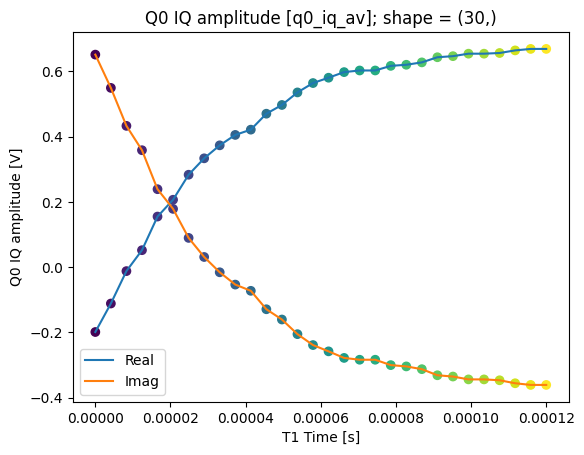

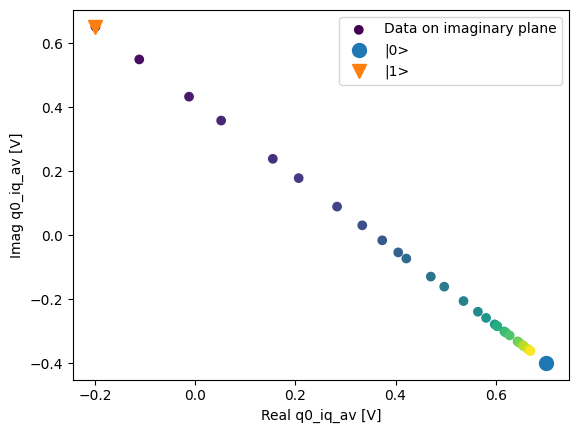

In [30]:
_ = plot_xr_complex(dataset_gridded.q0_iq_av)
_, ax = plot_xr_complex_on_plane(dataset_gridded.q0_iq_av)
_ = plot_complex_points(dataset_gridded.q0_iq_av_cal.values, ax=ax)

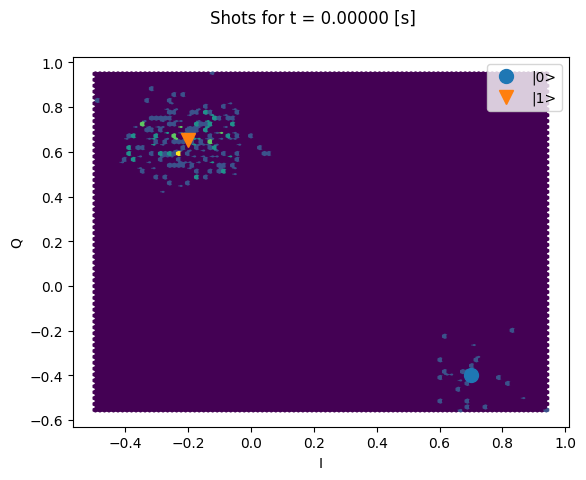

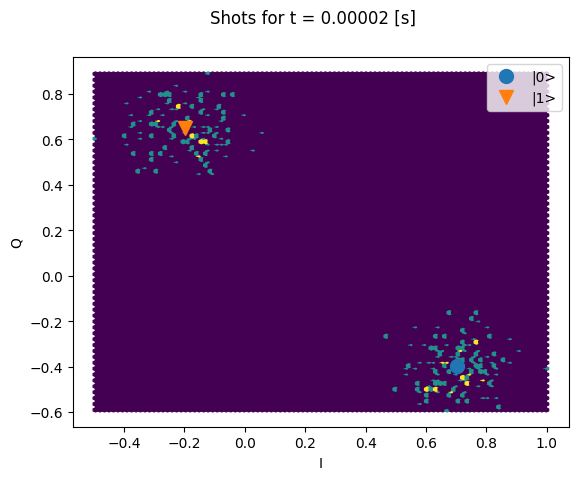

In [31]:
chosen_time_values = [
    t1_times[1],  # second value selected otherwise we won't see both centers
    t1_times[len(t1_times) // 5],  # a value close to the end of the experiment
]
for t_example in chosen_time_values:
    shots_example = (
        dataset_gridded.q0_iq_shots.real.sel(t1_time=t_example),
        dataset_gridded.q0_iq_shots.imag.sel(t1_time=t_example),
    )
    plt.hexbin(*shots_example)
    plt.xlabel("I")
    plt.ylabel("Q")
    calib_0 = dataset_gridded.q0_iq_av_cal.sel(cal="|0>")
    calib_1 = dataset_gridded.q0_iq_av_cal.sel(cal="|1>")
    plot_complex_points([calib_0, calib_1], ax=plt.gca())
    plt.suptitle(f"Shots for t = {t_example:.5f} [s]")
    plt.show()

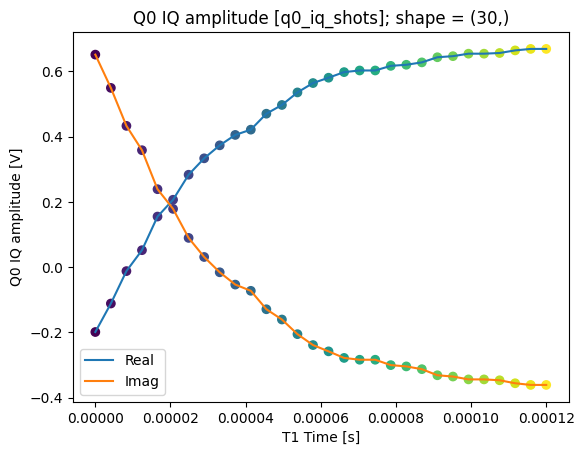

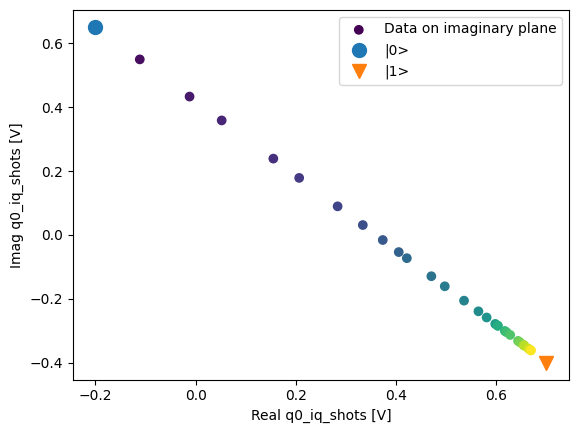

In [32]:
q0_iq_shots_mean = dataset_gridded.q0_iq_shots.mean(dim="repetitions", keep_attrs=True)
plot_xr_complex(q0_iq_shots_mean)
_, ax = plot_xr_complex_on_plane(q0_iq_shots_mean)
_ = plot_complex_points(centers, ax=ax)

In [33]:
display_source_code(dataset_examples.mk_t1_traces_dataset)

def mk_t1_traces_dataset ( 
 t1_times : Optional [ np . ndarray ] = None , 
 probabilities : Optional [ np . ndarray ] = None , 
 ** kwargs , 
 ) -> xr . Dataset : 
 """ 
 Generates a dataset with mock data of a T1 experiment for a single qubit including 
 calibration points for the ground and excited states, including all the individual 
 shots (repeated qubit state measurement for the same exact experiment); and 
 including all the signals that had to be digitized to obtain the rest of the data. 

 Parameters 
 ---------- 
 t1_times 
 Array with the T1 times corresponding to each probability in ``probabilities``. 
 probabilities 
 The probabilities of finding the qubit in the excited state. 
 **kwargs 
 Keyword arguments passed to 
 :func:`~quantify_core.utilities.examples_support.mk_iq_shots`. 
 """ 
 dataset_shots = mk_t1_shots_dataset ( t1_times , probabilities , ** kwargs ) 
 shots = dataset_shots . q0_iq_shots . values 
 shots_cal = dataset_shots . q0_iq_shots_cal . values 

 # generate mock traces for all shots 
 q0_traces = np . array ( tuple ( map ( mk_trace_for_iq_shot , shots . flatten ()))) 
 q0_traces = q0_traces . reshape ( * shots . shape , q0_traces . shape [ - 1 ]) 
 # generate mock traces for calibration points shots 
 q0_traces_cal = np . array ( tuple ( map ( mk_trace_for_iq_shot , shots_cal . flatten ()))) 
 q0_traces_cal = q0_traces_cal . reshape ( * shots_cal . shape , q0_traces_cal . shape [ - 1 ]) 

 traces_dims = ( "repetitions" , "main_dim" , "trace_dim" ) 
 traces_cal_dims = ( "repetitions" , "cal_dim" , "trace_dim" ) 
 trace_times = mk_trace_time () 
 trace_attrs = mk_main_coord_attrs ( long_name = "Trace time" , unit = "s" ) 

 relationships_with_traces = dataset_shots . relationships + [ 
 dattrs . QDatasetIntraRelationship ( 
 item_name = "q0_traces" , 
 related_names = [ "q0_traces_cal" ], 
 relation_type = "calibration" , 
 ) . to_dict (), 
 ] 

 data_vars = dict ( 
 q0_iq_av = dataset_shots . q0_iq_av , 
 q0_iq_av_cal = dataset_shots . q0_iq_av_cal , 
 q0_iq_shots = dataset_shots . q0_iq_shots , 
 q0_iq_shots_cal = dataset_shots . q0_iq_shots_cal , 
 q0_traces = ( traces_dims , q0_traces , dataset_shots . q0_iq_shots . attrs ), 
 q0_traces_cal = ( 
 traces_cal_dims , 
 q0_traces_cal , 
 dataset_shots . q0_iq_shots_cal . attrs , 
 ), 
 ) 
 coords = dict ( 
 t1_time = dataset_shots . t1_time , 
 cal = dataset_shots . cal , 
 trace_time = (( "trace_dim" ,), trace_times , trace_attrs ), 
 ) 

 dataset = xr . Dataset ( 
 data_vars = data_vars , 
 coords = coords , 
 attrs = mk_dataset_attrs ( relationships = relationships_with_traces ), 
 ) 

 return dataset

In [34]:
dataset = dataset_examples.mk_t1_traces_dataset(**mock_conf)
assert dataset == round_trip_dataset(dataset)  # confirm read/write

dataset

<xarray.Dataset>
Dimensions: (main_dim: 30, cal_dim: 2, repetitions: 256, trace_dim: 300)
Coordinates:
 t1_time (main_dim) float64 0.0 4.138e-06 ... 0.0001159 0.00012
 cal (cal_dim) <U3 '|0>' '|1>'
 trace_time (trace_dim) float64 0.0 1e-09 2e-09 ... 2.98e-07 2.99e-07
Dimensions without coordinates: main_dim, cal_dim, repetitions, trace_dim
Data variables:
 q0_iq_av (main_dim) complex128 (-0.19894114958423859+0.6515500138...
 q0_iq_av_cal (cal_dim) complex128 (0.7010588504157614-0.3984499861154...
 q0_iq_shots (repetitions, main_dim) complex128 (-0.289836545355741+0...
 q0_iq_shots_cal (repetitions, cal_dim) complex128 (0.610163454644259-0.4...
 q0_traces (repetitions, main_dim, trace_dim) complex128 (-0.289836...
 q0_traces_cal (repetitions, cal_dim, trace_dim) complex128 (0.61016345...
Attributes:
 tuid: 20230926-194337-462-bb8342
 dataset_name: 
 dataset_state: None
 timestamp_start: None
 timestamp_end: None
 quantify_dataset_version: 2.0.0
 software_versions: {}
 relationships: [{'item_name': 'q0_iq_av', 'relation_type': 'c...
 json_serialize_exclude: [] xarray.Dataset Dimensions: main_dim : 30 cal_dim : 2 repetitions : 256 trace_dim : 300 Coordinates: (3) t1_time (main_dim) float64 0.0 4.138e-06 ... 0.0001159 0.00012 unit : s long_name : T1 Time is_main_coord : True uniformly_spaced : True is_dataset_ref : False json_serialize_exclude : [] array([0.00000000e+00, 4.13793103e-06, 8.27586207e-06, 1.24137931e-05,
 1.65517241e-05, 2.06896552e-05, 2.48275862e-05, 2.89655172e-05,
 3.31034483e-05, 3.72413793e-05, 4.13793103e-05, 4.55172414e-05,
 4.96551724e-05, 5.37931034e-05, 5.79310345e-05, 6.20689655e-05,
 6.62068966e-05, 7.03448276e-05, 7.44827586e-05, 7.86206897e-05,
 8.27586207e-05, 8.68965517e-05, 9.10344828e-05, 9.51724138e-05,
 9.93103448e-05, 1.03448276e-04, 1.07586207e-04, 1.11724138e-04,
 1.15862069e-04, 1.20000000e-04]) cal (cal_dim) <U3 '|0>' '|1>' unit : long_name : Q0 state is_main_coord : False uniformly_spaced : True is_dataset_ref : False json_serialize_exclude : [] array(['|0>', '|1>'], dtype='<U3') trace_time (trace_dim) float64 0.0 1e-09 ... 2.98e-07 2.99e-07 unit : s long_name : Trace time is_main_coord : True uniformly_spaced : True is_dataset_ref : False json_serialize_exclude : [] array([0.00e+00, 1.00e-09, 2.00e-09, 3.00e-09, 4.00e-09, 5.00e-09,
 6.00e-09, 7.00e-09, 8.00e-09, 9.00e-09, 1.00e-08, 1.10e-08,
 1.20e-08, 1.30e-08, 1.40e-08, 1.50e-08, 1.60e-08, 1.70e-08,
 1.80e-08, 1.90e-08, 2.00e-08, 2.10e-08, 2.20e-08, 2.30e-08,
 2.40e-08, 2.50e-08, 2.60e-08, 2.70e-08, 2.80e-08, 2.90e-08,
 3.00e-08, 3.10e-08, 3.20e-08, 3.30e-08, 3.40e-08, 3.50e-08,
 3.60e-08, 3.70e-08, 3.80e-08, 3.90e-08, 4.00e-08, 4.10e-08,
 4.20e-08, 4.30e-08, 4.40e-08, 4.50e-08, 4.60e-08, 4.70e-08,
 4.80e-08, 4.90e-08, 5.00e-08, 5.10e-08, 5.20e-08, 5.30e-08,
 5.40e-08, 5.50e-08, 5.60e-08, 5.70e-08, 5.80e-08, 5.90e-08,
 6.00e-08, 6.10e-08, 6.20e-08, 6.30e-08, 6.40e-08, 6.50e-08,
 6.60e-08, 6.70e-08, 6.80e-08, 6.90e-08, 7.00e-08, 7.10e-08,
 7.20e-08, 7.30e-08, 7.40e-08, 7.50e-08, 7.60e-08, 7.70e-08,
 7.80e-08, 7.90e-08, 8.00e-08, 8.10e-08, 8.20e-08, 8.30e-08,
 8.40e-08, 8.50e-08, 8.60e-08, 8.70e-08, 8.80e-08, 8.90e-08,
 9.00e-08, 9.10e-08, 9.20e-08, 9.30e-08, 9.40e-08, 9.50e-08,
 9.60e-08, 9.70e-08, 9.80e-08, 9.90e-08, 1.00e-07, 1.01e-07,
 1.02e-07, 1.03e-07, 1.04e-07, 1.05e-07, 1.06e-07, 1.07e-07,
 1.08e-07, 1.09e-07, 1.10e-07, 1.11e-07, 1.12e-07, 1.13e-07,
 1.14e-07, 1.15e-07, 1.16e-07, 1.17e-07, 1.18e-07, 1.19e-07,
...
 1.80e-07, 1.81e-07, 1.82e-07, 1.83e-07, 1.84e-07, 1.85e-07,
 1.86e-07, 1.87e-07, 1.88e-07, 1.89e-07, 1.90e-07, 1.91e-07,
 1.92e-07, 1.93e-07, 1.94e-07, 1.95e-07, 1.96e-07, 1.97e-07,
 1.98e-07, 1.99e-07, 2.00e-07, 2.01e-07, 2.02e-07, 2.03e-07,
 2.04e-07, 2.05e-07, 2.06e-07, 2.07e-07, 2.08e-07, 2.09e-07,
 2.10e-07, 2.11e-07, 2.12e-07, 2.13e-07, 2.14e-07, 2.15e-07,
 2.16e-07, 2.17e-07, 2.18e-07, 2.19e-07, 2.20e-07, 2.21e-07,
 2.22e-07, 2.23e-07, 2.24e-07, 2.25e-07, 2.26e-07, 2.27e-07,
 2.28e-07, 2.29e-07, 2.30e-07, 2.31e-07

In [35]:
dataset.q0_traces.shape, dataset.q0_traces_cal.shape

((256, 30, 300), (256, 2, 300))

In [36]:
dataset_gridded = dh.to_gridded_dataset(
    dataset,
    dimension="main_dim",
    coords_names=["t1_time"],
)
dataset_gridded = dh.to_gridded_dataset(
    dataset_gridded,
    dimension="cal_dim",
    coords_names=["cal"],
)
dataset_gridded = dh.to_gridded_dataset(
    dataset_gridded, dimension="trace_dim", coords_names=["trace_time"]
)
dataset_gridded

<xarray.Dataset>
Dimensions: (t1_time: 30, cal: 2, trace_time: 300, repetitions: 256)
Coordinates:
 * t1_time (t1_time) float64 0.0 4.138e-06 ... 0.0001159 0.00012
 * cal (cal) <U3 '|0>' '|1>'
 * trace_time (trace_time) float64 0.0 1e-09 2e-09 ... 2.98e-07 2.99e-07
Dimensions without coordinates: repetitions
Data variables:
 q0_iq_av (t1_time) complex128 (-0.19894114958423859+0.65155001388...
 q0_iq_av_cal (cal) complex128 (0.7010588504157614-0.3984499861154196j...
 q0_iq_shots (repetitions, t1_time) complex128 (-0.289836545355741+0....
 q0_iq_shots_cal (repetitions, cal) complex128 (0.610163454644259-0.41025...
 q0_traces (repetitions, t1_time, trace_time) complex128 (-0.289836...
 q0_traces_cal (repetitions, cal, trace_time) complex128 (0.61016345464...
Attributes:
 tuid: 20230926-194337-462-bb8342
 dataset_name: 
 dataset_state: None
 timestamp_start: None
 timestamp_end: None
 quantify_dataset_version: 2.0.0
 software_versions: {}
 relationships: [{'item_name': 'q0_iq_av', 'relation_type': 'c...
 json_serialize_exclude: [] xarray.Dataset Dimensions: t1_time : 30 cal : 2 trace_time : 300 repetitions : 256 Coordinates: (3) t1_time (t1_time) float64 0.0 4.138e-06 ... 0.0001159 0.00012 unit : s long_name : T1 Time is_main_coord : True uniformly_spaced : True is_dataset_ref : False json_serialize_exclude : [] array([0.000000e+00, 4.137931e-06, 8.275862e-06, 1.241379e-05, 1.655172e-05,
 2.068966e-05, 2.482759e-05, 2.896552e-05, 3.310345e-05, 3.724138e-05,
 4.137931e-05, 4.551724e-05, 4.965517e-05, 5.379310e-05, 5.793103e-05,
 6.206897e-05, 6.620690e-05, 7.034483e-05, 7.448276e-05, 7.862069e-05,
 8.275862e-05, 8.689655e-05, 9.103448e-05, 9.517241e-05, 9.931034e-05,
 1.034483e-04, 1.075862e-04, 1.117241e-04, 1.158621e-04, 1.200000e-04]) cal (cal) <U3 '|0>' '|1>' unit : long_name : Q0 state is_main_coord : False uniformly_spaced : True is_dataset_ref : False json_serialize_exclude : [] array(['|0>', '|1>'], dtype='<U3') trace_time (trace_time) float64 0.0 1e-09 ... 2.98e-07 2.99e-07 unit : s long_name : Trace time is_main_coord : True uniformly_spaced : True is_dataset_ref : False json_serialize_exclude : [] array([0.00e+00, 1.00e-09, 2.00e-09, ..., 2.97e-07, 2.98e-07, 2.99e-07]) Data variables: (6) q0_iq_av (t1_time) complex128 (-0.19894114958423859+0.65155001... unit : V long_name : Q0 IQ amplitude is_main_var : True uniformly_spaced : True grid : True is_dataset_ref : False has_repetitions : False json_serialize_exclude : [] array([-0.19894115+0.65155001j, -0.11155212+0.54951255j,
 -0.01216713+0.43313537j, 0.05193768+0.35848368j,
 0.15504951+0.2389656j , 0.20661408+0.17861197j,
 0.2833043 +0.08961707j, 0.33361813+0.03110011j,
 0.37345395-0.01576696j, 0.40534772-0.05352011j,
 0.42151034-0.07261241j, 0.47040441-0.12912367j,
 0.49717119-0.16057795j, 0.53565518-0.20550725j,
 0.56438276-0.23892233j, 0.58075078-0.25822004j,
 0.59794213-0.27834108j, 0.60292187-0.28390675j,
 0.60292187-0.28390675j, 0.61706292-0.30039156j,
 0.6204547 -0.30436927j, 0.62775114-0.31283759j,
 0.64350021-0.33151635j, 0.64683289-0.33543496j,
 0.65442395-0.34419789j, 0.65442395-0.34419789j,
 0.65650831-0.34686819j, 0.66449532-0.35602708j,
 0.66901604-0.36113374j, 0.66901604-0.36113374j]) q0_iq_av_cal (cal) complex128 (0.7010588504157614-0.3984499861... unit : V long_name : Q0 IQ Calibration is_main_var : False uniformly_spaced : True grid : True is_dataset_ref : False has_repetitions : False json_serialize_exclude : [] array([ 0.70105885-0.39844999j, -0.19894115+0.65155001j]) q0_iq_shots (repetitions, t1_time) complex128 (-0.289836545355741+0.6397419222... unit : V long_name : Q0 IQ amplitude is_main_var : True uniformly_spaced : True grid : True is_dataset_ref : False has_repetitions : True json_serialize_exclude : [] array([[-0.28983655+0.63974192j, -0.28983655+0.56980106j,
 -0.28983655+0.53688137j, ..., -0.28983655+0.7151281j ,
 -0.28983655+0.78818874j, -0.28983655+0.78818874j],
 [-0.24253459+0.62214896j, -0.24253459+0.5353232j ,
 -0.24253459+0.59304477j, ..

In [37]:
dataset_gridded.q0_traces.shape, dataset_gridded.q0_traces.dims

((256, 30, 300), ('repetitions', 't1_time', 'trace_time'))

In [38]:
trace_example = dataset_gridded.q0_traces.sel(
    repetitions=123, t1_time=dataset_gridded.t1_time[-1]
)
trace_example.shape, trace_example.dtype

((300,), dtype('complex128'))

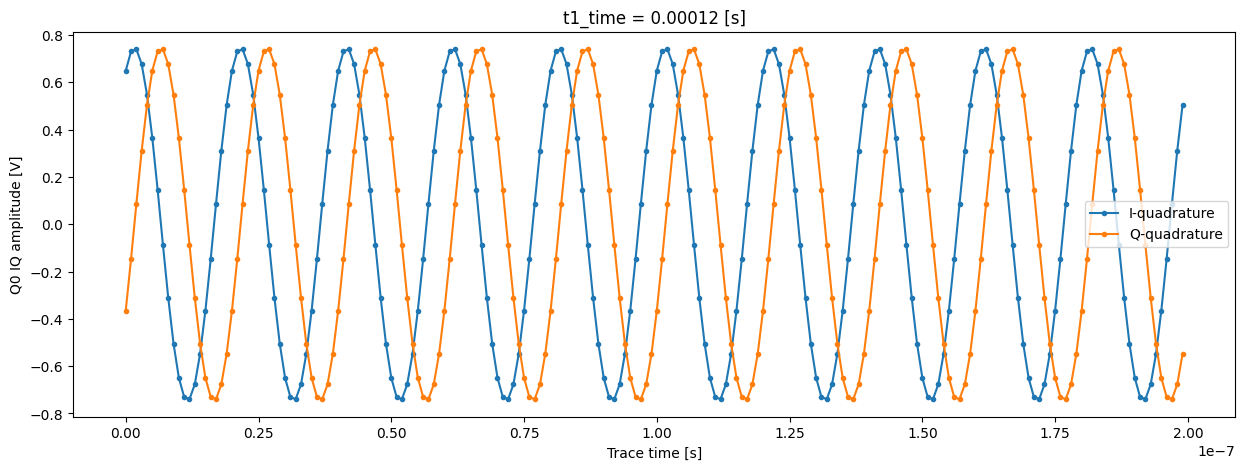

In [39]:
trace_example_plt = trace_example[:200]
trace_example_plt.real.plot(figsize=(15, 5), marker=".", label="I-quadrature")
trace_example_plt.imag.plot(marker=".", label="Q-quadrature")
plt.gca().legend()
plt.show()